# Sber Futures Price Forcast

# Imports

In [41]:
import statistics
import pandas as pd
import numpy as np
#from spectrum import Periodogram, data_cosine
import matplotlib.pyplot as plt
import scipy.stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats
from scipy.stats import lognorm, kstest
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
import spectrum

from matplotlib.ticker import IndexLocator, FixedLocator

ModuleNotFoundError: No module named 'spectrum'

In [14]:
df = pd.read_csv('/Users/egorbykov/Desktop/Универ/Технический анализ и статистика фондового рынка/Курсовая/Sber_Price.csv', names=['date', 'values'], header=0, delimiter=';', index_col=False)

# Преобразуем текст в формат даты

In [15]:
#print(f"Total samples : {len(df)}")
#df.date = pd.to_datetime(df['date'], format='%d.%m.%Y').dt.strftime("%d-%m-%Y")

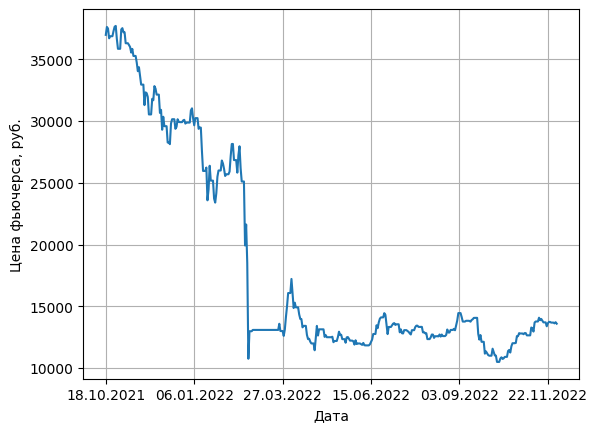

In [19]:
f = plt.figure()
ax1 = f.add_subplot()
ax1.plot(df['date'], df['values'])
ax1.xaxis.set_major_locator(IndexLocator(base=80, offset=0))
ax1.set_xlabel('Дата')
ax1.set_ylabel('Цена фьючерса, руб.')
ax1.grid()
#df.plot()
#plt.show()

In [30]:
df.describe()

,values
count,409.000000
mean,18396.374083
std,8481.387356
min,10499.000000
25%,12649.000000
50%,13417.000000
75%,25993.000000
max,37695.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    409 non-null    object
 1   values  409 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.5+ KB


We can see a structure change, which happened in February of 2022. Also trades were not held in March of 2022, so we will exclude them. To continue modeling we need to divide the time series for the one before the change and the one after the change



In [25]:
df_before_change = df[:126]
df_before_change.reset_index()
df_before_change.tail()

,date,values
121,16.02.2022,27954
122,17.02.2022,26184
123,18.02.2022,25103
124,19.02.2022,25103
125,20.02.2022,25103


In [29]:
df_after_change = df[252:]
df_before_change.reset_index(drop=True, inplace=True)
df_after_change.head()

,date,values
252,27.06.2022,14446
253,28.06.2022,14309
254,29.06.2022,13565
255,30.06.2022,12752
256,01.07.2022,13329


# Modeling of the Sber futures price before the structure change

# HOW TO PLOT PERIODOGRAM HERE?
p = Periodogram(df_before_change)
p.plot

# # Kolmogorov-Smirnov normality test

In [38]:
def acf_test(vector):
    result = adfuller(vector)
    print('ADF Statistics: %f' % result[0])
    print('p-value: ', result[1])
    print('Critical Values:')
    for key, values in result[4].items():
        print('\t%s: %3f' % (key, values))

In [40]:
acf_test(df_before_change['values'])

ADF Statistics: -1.213683
p-value:  0.667682186298003
Critical Values:
	1%: -3.483779
	5%: -2.884954
	10%: -2.579257


In [ ]:
##creating a function for building ARIMA model